# 探索数据集
## 分析的问题

-  是否生还与年龄的相关性。以及年龄的分布区间。
2. 是否生还与票价高低的相关性。
3. 是否生还与性别的关系
4. 是否生还与是否有父母孩子个数的相关性。

In [1]:
import numpy as np
import pandas as pd
import os


path = os.getcwd()
filename = '/titanic-data.csv'
# 读取cvs为datafame数据
titanic_data_df = pd.read_csv(path + filename)
titanic_data_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
#数据丢失探索。
titanic_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
## 使用该列的平均值将Age的空值进行替换
titanic_data_df.fillna(value={'Age' : titanic_data_df['Age'].mean()})

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


Populating the interactive namespace from numpy and matplotlib


([<matplotlib.patches.Wedge at 0x11210e090>,
  <matplotlib.text.Text at 0x11211e8d0>])

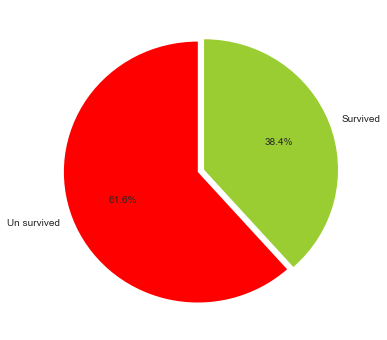

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)
%pylab inline
# 生还者与未生还者的比例
plt.figure(figsize=(6, 6))
labels= ['Un survived','Survived']
colors = ['red','yellowgreen']
sizes = titanic_data_df.groupby('Survived').size()
explode = (0.05,0)
plt.pie(sizes,explode=explode,labels=labels,colors=colors,
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = False,
                                startangle = 90,pctdistance = 0.6)

In [12]:
titanic_data_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 分析第一个问题
##### 泰坦尼克号乘客年龄的与是否生还均值的分布区间

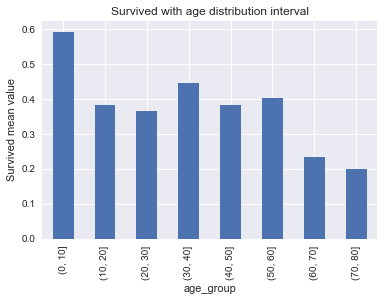

In [15]:

def age_cut_arrage(pd_data,column_name = 'Age'):
    entrins = np.arange(0,90,10)
    return pd.cut(pd_data[column_name],entrins)
plt.xlabel('Distribution interval')
plt.ylabel('Survived mean value')
plt.title('Survived with age distribution interval')
titanic_data_df['age_group'] = age_cut_arrage(titanic_data_df)
titanic_data_df.groupby('age_group').mean()['Survived'].plot(kind='bar')

#### 是否生还与年龄的相关性

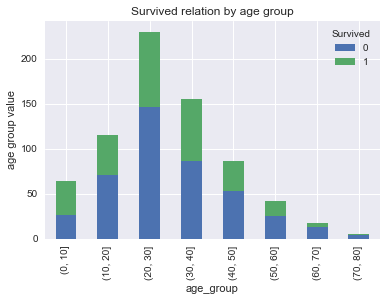

In [18]:
def survived_size(key,df_data = titanic_data_df):
    return df_data.groupby([key,'Survived']).count()['PassengerId'].unstack()
survived_size('age_group').plot(kind = 'bar',title = 'Survived relation by age group',stacked = True)
plt.ylabel('Survived and un survived count about age gruop')

#####  根据上图大致可以看出，随着年龄的增高，其生还率会降低。生还比例的年龄段在 （30-40），（20-30）偏多

In [17]:
def correlation(x, y):
    x_std = (x - x.mean()) / x.std()
    y_std = (y - y.mean()) /  y.std()
    return (x_std * y_std).mean()

correlation(titanic_data_df['Survived'],titanic_data_df['Age'])

-0.077884306616092594

###### 由此可得出，是否生还与年龄的相关性不大。

- 查看性别与是否生还的关系

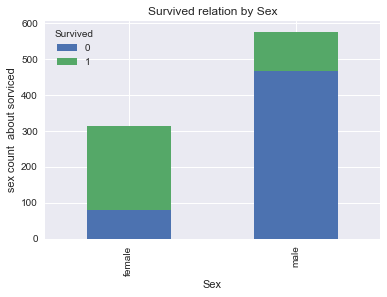

In [19]:
survived_size('Sex').plot(kind = 'bar',title = 'Survived relation by Sex',stacked = True)
plt.ylabel('Survived and un survived count about sex')

#### 由此可推测是否生还比例中，男性中生还的比例明显低于女性。

####  票价与是否生还是否有关系。

In [78]:
#将票价分为十个组
def cut_fares():
    fares = titanic_data_df['Fare']
    entries = np.arange(fares.min(),fares.max(),(fares.max() - fares.min()) / 10)
    return pd.cut(titanic_data_df['Fare'],entries)

titanic_data_df['Fare_group'] = cut_fares()

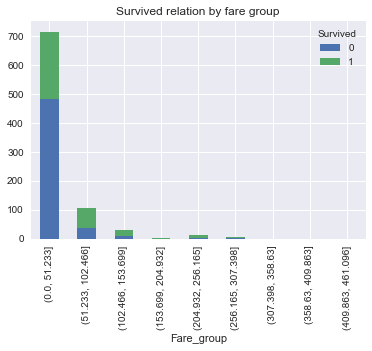

In [79]:
survived_size('Fare_group').plot(kind = 'bar',title = 'Survived relation by fare group',stacked = True)
plt.ylabel('Survived and un survived count about fare gruop')

In [82]:
#票价与是否生还的相关性
correlation(titanic_data_df['Survived'],titanic_data_df['Fare'])

0.25701773840922115

##### 以上结果可以大致看出票价与是否生存有较小的相关性。且呈正相关。

In [93]:
# 查看父母孩子个数与是否生还的相关性
correlation(titanic_data_df['Parch'],titanic_data_df['Survived'])

0.08153779158731747

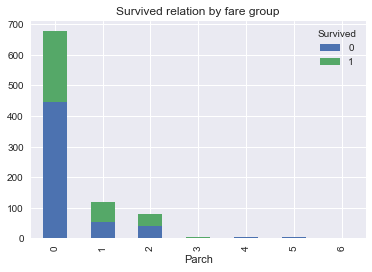

In [97]:
survived_size('Parch').plot(kind = 'bar',title = 'Survived relation by fare group',stacked = True)
plt.ylabel('survived and un survived count about fare gruop')

#### 结论阐述
######  发现
- 泰坦吉尼克号的乘客是否生还的探索中，发现，年龄在20 - 40岁阶段的乘客生还的比例较高。
- 有一个孩子，或者有两个父母孩子的乘客，他们的生还几率几乎是对等的，这可能说明，他们在遇险时有选择保全自己的孩子， 让他们得以生还。
- 在生还性别比例中，女性生还几率明显高于男性。
###### 不足点
- 关于以上的发现，数据总量较小，只能近似推测生还几率的相关性。
- 这个样本虽然不能代表总体的乘客，但是基于部分样本数据的分析，还是能说明生还几率与性别、年龄、是否有孩子父母的关系。分析是大致正确的，只是稍微有点偏差。
- 关于处理的方法，也会带入不确定性，比如票价的分类，应该根据当时消费水平，区间合理分配分组。年龄可以分为，小孩，青年，老年。
###### 其他因素
- 各个船舱上救生设备，比如，救生衣，救生船，氧气面罩。的数量。
- 乘客中会游泳的数量比例。